## Mastering Machine Learning 2025

### Clase 1: Introducción a redes neuronales en pytorch

- Redes densas
- Redes para regresión
- Funciones de activación y pérdida


Comandos para poder instalar todas las librerias

In [ ]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128 # Este no es un comando general, depende de tu version de cuda, por ende consulta https://pytorch.org/get-started/locally/ y en linux corre nvidia-smi para ver tu version de cuda
pip install pandas scikit-learn seaborn 


Empecemos importando numpy y pandas

In [40]:
import numpy as np
import pandas as pd

Montamos el path donde iran los datos

In [41]:
data_mpg = "/home/erich/dev/mastering_machine_learning/taller_clase_2/Erich/data/auto-mpg.data"

Carguemos el archivo auto-mpg.data (disponible en Bloque Neón) usando pandas. Note que debemos incluir los nombres de las columnas, además de indicar los caracteres para separación, nas y comentarios.

In [42]:
df = pd.read_csv(data_mpg ,
                 names=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin'],
                 sep=' ',
                 na_values='?',
                 comment='\t',
                 skipinitialspace=True
                 )

Exploremos las primeras filas del dataframe.

In [43]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


- MPG: miles per gallon
- Cylinders: # de cilindros
- Displacement: volumen desplazado por los pistones
- Horsepower: caballos de potencia
- Weight: peso
- Acceleration: aceleración
- Model Year: año/modelo
- Origin: 1:USA, 2:Europa, 3:Japón

Exploremos el tamaño del df

In [44]:
df.shape

(398, 8)

Identificamos NAs en los datos

In [45]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [46]:
df.dropna(inplace=True)

In [47]:
df.shape

(392, 8)

In [48]:
df=df.reset_index(drop=True)

In [49]:
df

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86.0,2790.0,15.6,82,1
388,44.0,4,97.0,52.0,2130.0,24.6,82,2
389,32.0,4,135.0,84.0,2295.0,11.6,82,1
390,28.0,4,120.0,79.0,2625.0,18.6,82,1


Separamos los datos en entrenamiento y prueba

In [50]:
from sklearn import model_selection

In [51]:
train, test = model_selection.train_test_split(df, train_size=0.8, random_state=100)
train.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
338,30.0,4,135.0,84.0,2385.0,12.9,81,1
328,33.8,4,97.0,67.0,2145.0,18.0,80,3
352,32.9,4,119.0,100.0,2615.0,14.8,81,3
372,38.0,4,105.0,63.0,2125.0,14.7,82,1
304,28.8,6,173.0,115.0,2595.0,11.3,79,1


In [52]:
train.shape

(313, 8)

In [53]:
test = df.drop(train.index)
test.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
18,27.0,4,97.0,88.0,2130.0,14.5,70,3
21,24.0,4,107.0,90.0,2430.0,14.5,70,2


In [54]:
print(train.shape)
print(test.shape)

(313, 8)
(79, 8)


Realicemos una exploración descriptiva de los datos, calculando inicialmente estadísticas de cada variable continua

In [55]:
train.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,23.749521,5.424920,191.940895,104.501597,2955.140575,15.545048,76.031949,1.597444
std,7.966002,1.717636,104.522896,38.748956,845.347391,2.765223,3.750077,0.822905
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.000000,2226.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,141.000000,94.000000,2720.000000,15.500000,76.000000,1.000000
75%,29.500000,8.000000,302.000000,130.000000,3563.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


Exploremos relaciones bivariadas con pairplot de seaborn

In [56]:
import seaborn as sns

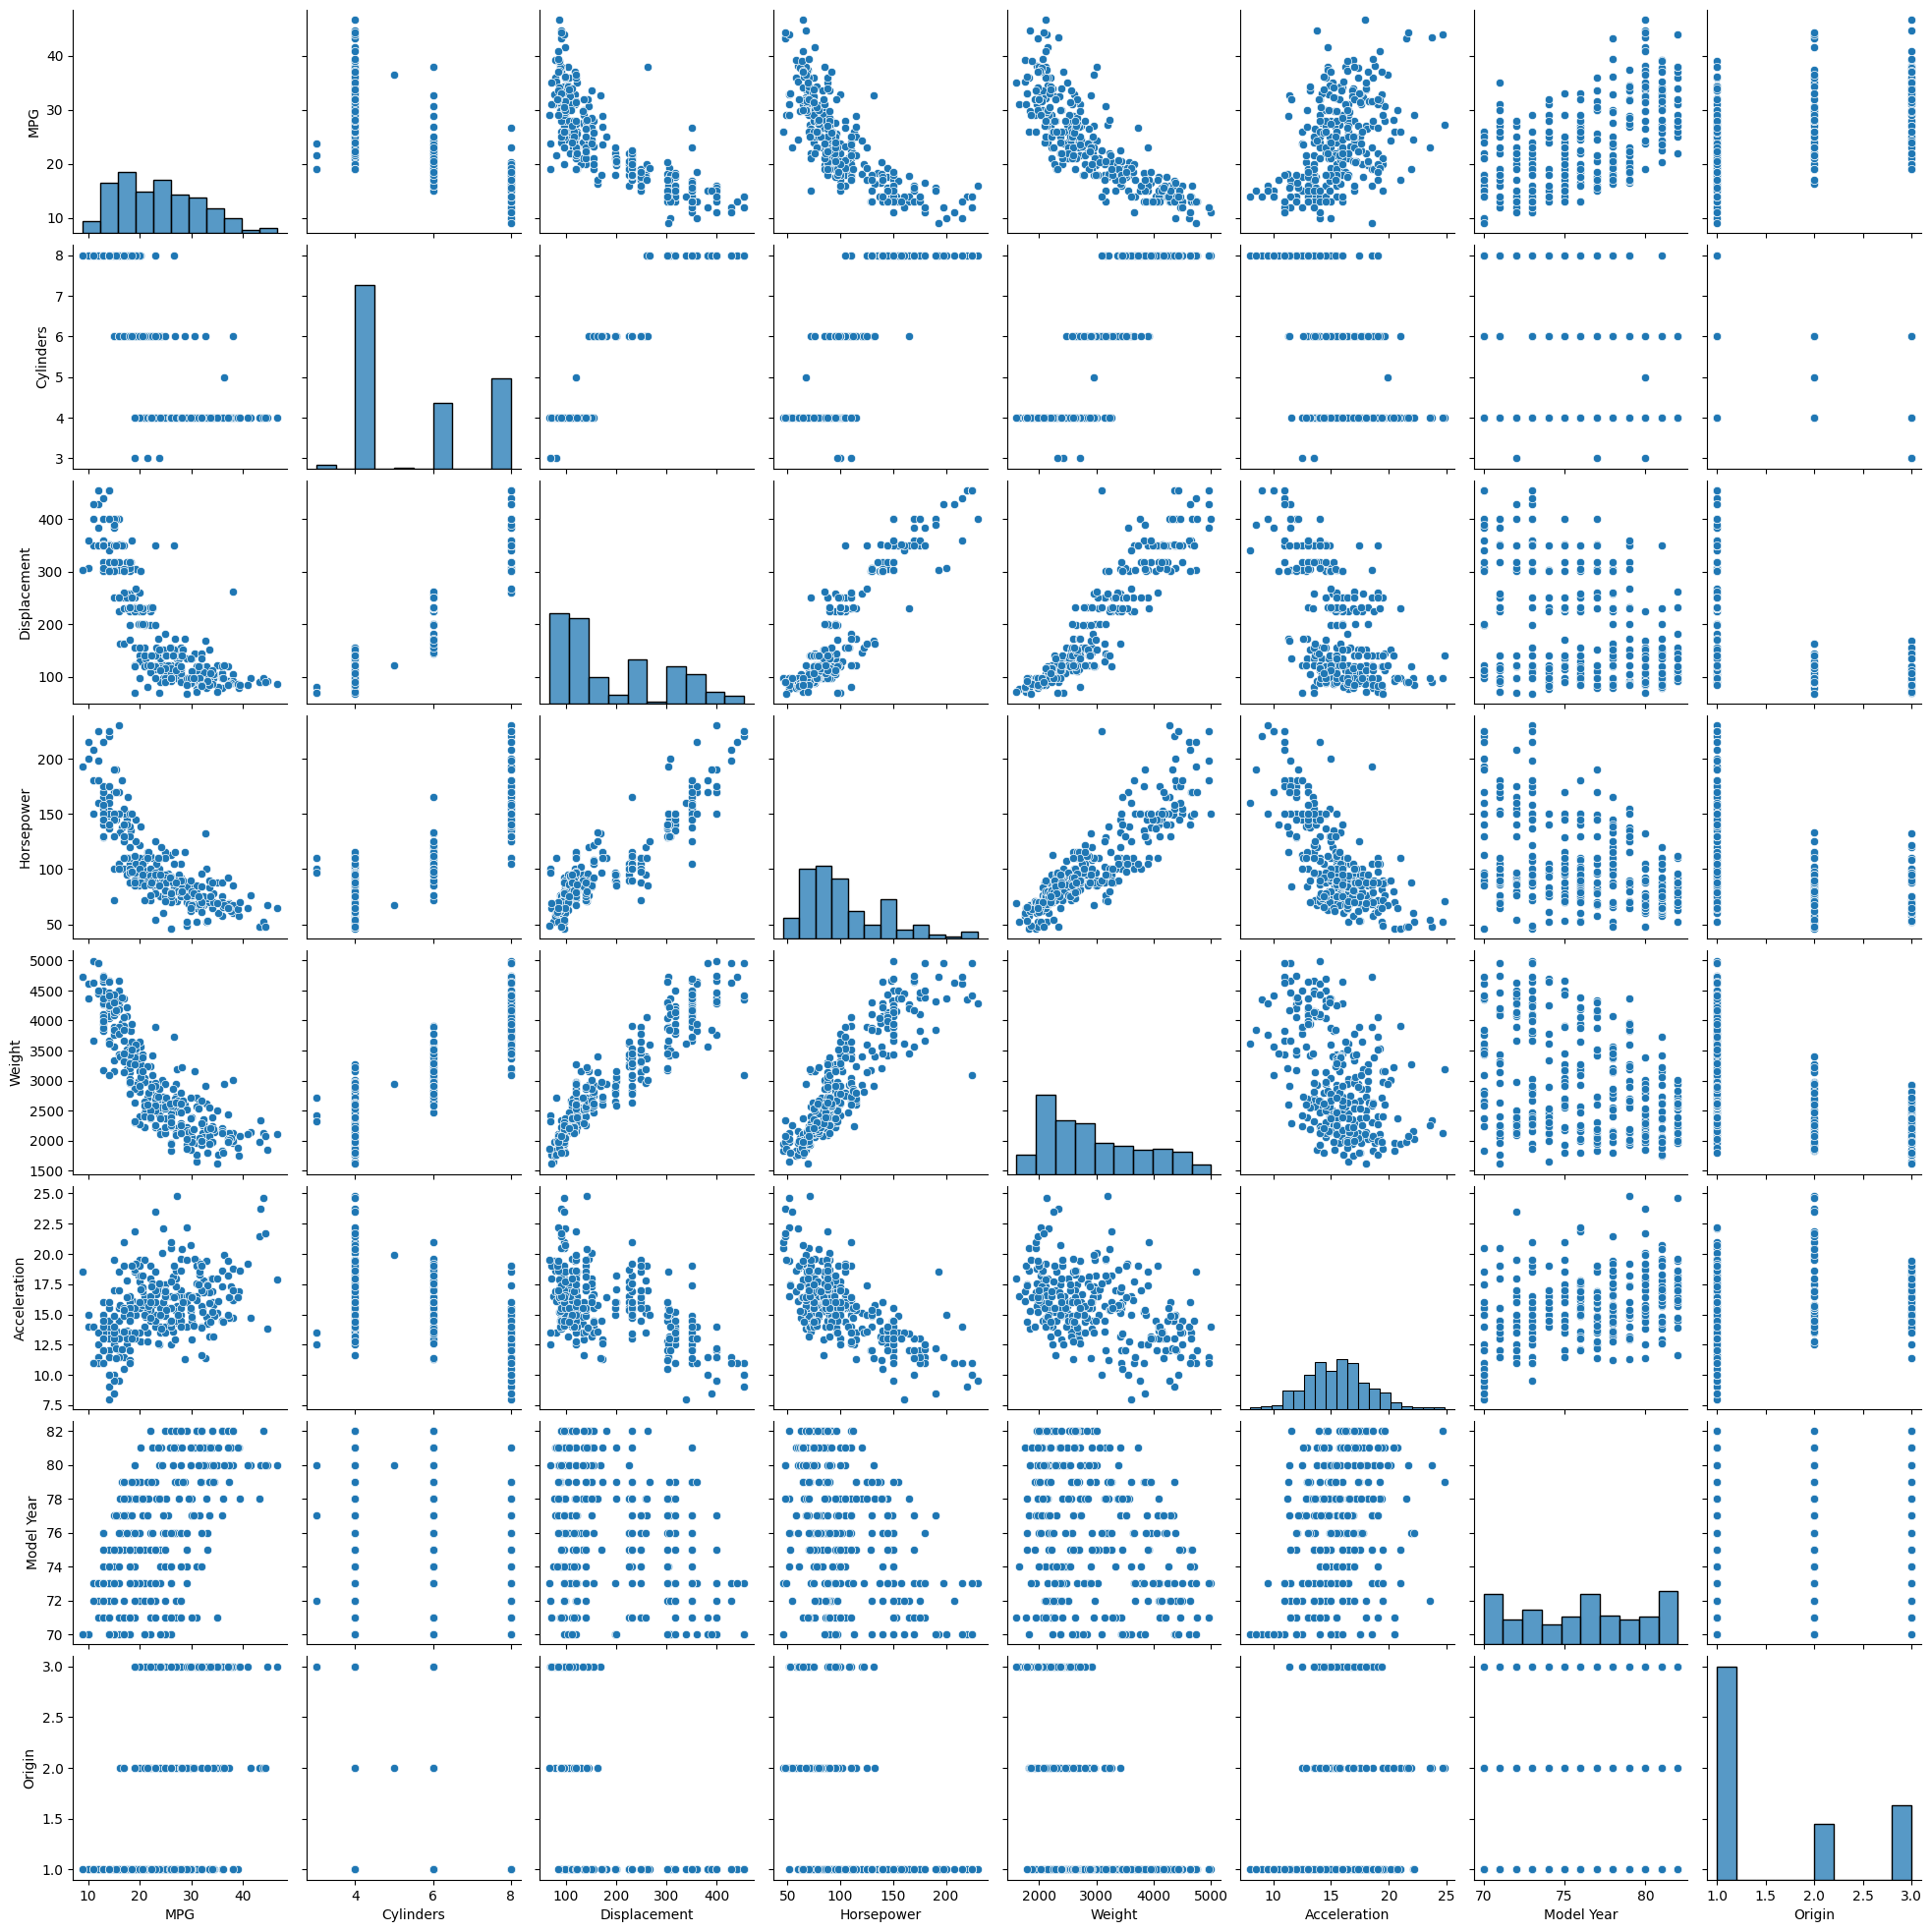

In [25]:
sns.pairplot(train)

Calculemos la matriz de correlacion

In [57]:
train.corr()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.772426,-0.802326,-0.785584,-0.826179,0.457481,0.598676,0.579119
Cylinders,-0.772426,1.000000,0.952178,0.849493,0.899086,-0.533705,-0.362869,-0.565673
Displacement,-0.802326,0.952178,1.000000,0.903217,0.931881,-0.571698,-0.384420,-0.610077
Horsepower,-0.785584,0.849493,0.903217,1.000000,0.874688,-0.697374,-0.416832,-0.466475
Weight,-0.826179,0.899086,0.931881,0.874688,1.000000,-0.449165,-0.321738,-0.580604
Acceleration,0.457481,-0.533705,-0.571698,-0.697374,-0.449165,1.000000,0.306935,0.230824
Model Year,0.598676,-0.362869,-0.384420,-0.416832,-0.321738,0.306935,1.000000,0.221252
Origin,0.579119,-0.565673,-0.610077,-0.466475,-0.580604,0.230824,0.221252,1.000000


<Axes: >

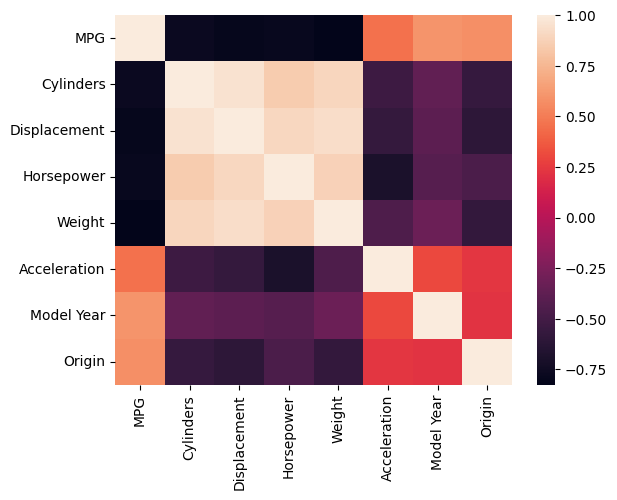

In [58]:
sns.heatmap(train.corr())

In [59]:
numeric_cols = ['Cylinders', 'Displacement','Horsepower','Weight','Acceleration', 'Model Year']

In [60]:
train_norm , test_norm = train.copy(), test.copy()

for col in numeric_cols:
  mean = train[col].mean()
  std = train[col].std()

  train_norm[col] = ( train_norm[col] - mean) /std
  test_norm[col] = (test_norm[col] - mean) /std

In [30]:
train_norm.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
338,30.0,-0.829582,-0.544770,-0.529088,-0.674445,-0.956541,1.324786,1
328,33.8,-0.829582,-0.908326,-0.967809,-0.958352,0.887795,1.058125,3
352,32.9,-0.829582,-0.697846,-0.116173,-0.402368,-0.269435,1.324786,3
372,38.0,-0.829582,-0.831788,-1.071038,-0.982011,-0.305598,1.591448,1
304,28.8,0.334809,-0.181213,0.270934,-0.426027,-1.535156,0.791464,1


Codificación one-hot para Origin y generación de datos de entrada x_train y x_test, en formato tensor

In [61]:
import torch
from torch.nn.functional import one_hot

# determinar número de categorías
n_categories = len(set(train_norm['Origin']))

# codificación one hot para Origin - train set
origin_encoded = one_hot(torch.from_numpy(train_norm['Origin'].values % n_categories))
x_train_numeric = torch.tensor(train_norm[numeric_cols].values)
x_train = torch.cat([x_train_numeric, origin_encoded], 1).float()

# codificación one hot para Origin - test set
origin_encoded = one_hot(torch.from_numpy(test_norm['Origin'].values % n_categories))
x_test_numeric = torch.tensor(test_norm[numeric_cols].values)
x_test = torch.cat([x_test_numeric, origin_encoded], 1).float()

Datos de salida en formato tensor

In [62]:
y_train = torch.tensor(train_norm['MPG'].values).float()
y_test = torch.tensor(test_norm['MPG'].values).float()

In [64]:
x_train

tensor([[-0.8296, -0.5448, -0.5291,  ...,  0.0000,  1.0000,  0.0000],
        [-0.8296, -0.9083, -0.9678,  ...,  1.0000,  0.0000,  0.0000],
        [-0.8296, -0.6978, -0.1162,  ...,  1.0000,  0.0000,  0.0000],
        ...,
        [-0.8296, -0.9753, -1.4581,  ...,  0.0000,  0.0000,  1.0000],
        [-0.8296, -0.4969, -0.4259,  ...,  0.0000,  1.0000,  0.0000],
        [ 1.4992,  2.5168,  3.1097,  ...,  0.0000,  1.0000,  0.0000]])

Crear un Dataset y un DataLoader para el entrenamiento de los modelos

In [36]:
from torch.utils.data import Dataset, TensorDataset, DataLoader

train_ds = TensorDataset(x_train, y_train)
batch_size = 16
torch.manual_seed(42)

train_dl = DataLoader(train_ds, batch_size, shuffle = True)

Crear un primer modelo con dos capas ocultas de 8 y 4 neuronas (función de activación ReLU) y una salida lineal (regresión)

In [37]:
import torch.nn as nn

hidden_units = [8, 4]
input_size = x_train.shape[1]

all_layers = []
for hidden_units_layer in hidden_units:
  layer = nn.Linear(input_size, hidden_units_layer)
  all_layers.append(layer)
  all_layers.append(nn.ReLU())
  input_size = hidden_units_layer

all_layers.append(nn.Linear(hidden_units[-1], 1))
model = nn.Sequential(*all_layers)

model

Sequential(
  (0): Linear(in_features=9, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
)

Entrenar el modelo usando descenso del gradiente estocástico y función de pérdida MSE (mean squared error)

In [38]:
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

torch.manual_seed(1)
num_epochs = 200
log_epochs = 20

for epoch in range(num_epochs):
  loss_hist_train = 0
  for x_batch, y_batch in train_dl:
    pred = model(x_batch)[:,0]
    loss = loss_fn(pred, y_batch)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_hist_train += loss.item()

  if epoch % log_epochs == 0:
    print(f'Epoch {epoch} Loss {loss_hist_train/len(train_dl):.4f}')

/home/erich/dev/mastering_machine_learning/.venv/lib/python3.10/site-packages/torch/autograd/graph.py:824: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Epoch 0 Loss 606.3316
Epoch 20 Loss 8.2657
Epoch 40 Loss 8.2380
Epoch 60 Loss 7.8241
Epoch 80 Loss 7.4453
Epoch 100 Loss 7.1684
Epoch 120 Loss 7.2043
Epoch 140 Loss 6.9791
Epoch 160 Loss 7.0780
Epoch 180 Loss 6.9038


Predicción de un nuevo dato de prueba y evaluación con MSE y MAE (mean absolute error)

In [39]:
with torch.no_grad():
  pred = model(x_test.float())[:,0]
  loss = loss_fn(pred, y_test)
  print(f'Test MSE: {loss.item():.4f}')
  print(f'Test MAE: {nn.L1Loss()(pred,y_test).item():.4f}')

Test MSE: 5.1344
Test MAE: 1.6644
